# Statistical modeling for TRIBE2 PanCan 

In [1]:
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.io import arff

In [2]:
evaluation = {}

## Using the best measure results
This regression analysis uses the 'best' mutations, as chosen based on the correlations previously computed.

In [3]:
arm0_best_dataset = pd.read_csv("arm0_best_mutations.csv")
arm1_best_dataset = pd.read_csv("arm1_best_mutations.csv")

### Observing the data

In [4]:
from sklearn.model_selection import train_test_split

arm0_x, arm0_y = (
    arm0_best_dataset.drop(["dpfs", "PatientFirstName"], axis="columns"),
    arm0_best_dataset["dpfs"],
)
arm0_x_train, arm0_x_test, arm0_y_train, arm0_y_test = train_test_split(
    arm0_x, arm0_y, test_size=0.30, random_state=42
)
# Disabled for performance
# train_dataset = arm0_x_train.copy()
# train_dataset.insert(0, "dpfs", arm0_y_train)
# _ = sns.pairplot(train_dataset, kind="reg", diag_kind="kde")

arm1_x, arm1_y = (
    arm1_best_dataset.drop(["dpfs", "PatientFirstName"], axis="columns"),
    arm1_best_dataset["dpfs"],
)
arm1_x_train, arm1_x_test, arm1_y_train, arm1_y_test = train_test_split(
    arm1_x, arm1_y, test_size=0.30, random_state=42
)
# Disabled for performance
# train_dataset = arm1_x_train.copy()
# train_dataset.insert(0, "dpfs", arm1_y_train)
# _ = sns.pairplot(train_dataset, kind="reg", diag_kind="kde")

### Linear model

In [5]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
evaluation["best-linear"] = {}

#### arm0

In [6]:
_ = model.fit(arm0_x_train, arm0_y_train)

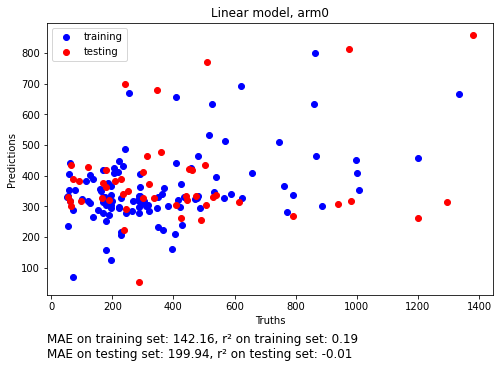

In [7]:
from sklearn.metrics import median_absolute_error, r2_score

arm0_y_train_pred = model.predict(arm0_x_train)
mae_train = median_absolute_error(arm0_y_train, arm0_y_train_pred)
r2_train = r2_score(arm0_y_train, arm0_y_train_pred)
score = f"MAE on training set: {mae_train:.2f}, r² on training set: {r2_train:.2f}"

fig, ax = plt.subplots(figsize=(8, 5))
plt.scatter(arm0_y_train, arm0_y_train_pred, c="blue", label="training")
plt.title("Linear model, arm0")
plt.ylabel("Predictions")
plt.xlabel("Truths")

arm0_y_pred = model.predict(arm0_x_test)
mae = median_absolute_error(arm0_y_test, arm0_y_pred)
r2 = r2_score(arm0_y_test, arm0_y_pred)
score += f"\nMAE on testing set: {mae:.2f}, r² on testing set: {r2:.2f}"

plt.scatter(arm0_y_test, arm0_y_pred, c="red", label="testing")
plt.figtext(0.125, -0.05, score, fontsize=12)
ax.legend()
plt.show()

evaluation["best-linear"]["arm0"] = [(mae_train, r2_train), (mae, r2)]

In [8]:
arm0_best_coefs = pd.DataFrame(
    model.coef_, columns=["Coefficients"], index=arm0_x_train.columns
)
arm0_best_coefs

,Coefficients
CellCycle,-1.047343
HIPPO,-180.957222
MYC,137.307753
NOTCH,-6.831379
NRF2,10.254035
PI3K,19.201233
RTK-RAS,-188885.835039
TGF-Beta,-17.374478
TP53,-2.209305
WNT,4.346588


#### arm1

In [9]:
_ = model.fit(arm1_x_train, arm1_y_train)

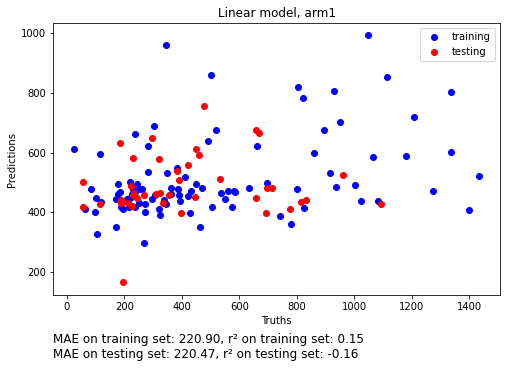

In [10]:
arm1_y_train_pred = model.predict(arm1_x_train)
mae_train = median_absolute_error(arm1_y_train, arm1_y_train_pred)
r2_train = r2_score(arm1_y_train, arm1_y_train_pred)
score = f"MAE on training set: {mae_train:.2f}, r² on training set: {r2_train:.2f}"

fig, ax = plt.subplots(figsize=(8, 5))
plt.scatter(arm1_y_train, arm1_y_train_pred, c="blue", label="training")
plt.title("Linear model, arm1")
plt.ylabel("Predictions")
plt.xlabel("Truths")

arm1_y_pred = model.predict(arm1_x_test)
mae = median_absolute_error(arm1_y_test, arm1_y_pred)
r2 = r2_score(arm1_y_test, arm1_y_pred)
score += f"\nMAE on testing set: {mae:.2f}, r² on testing set: {r2:.2f}"

plt.scatter(arm1_y_test, arm1_y_pred, c="red", label="testing")
plt.figtext(0.125, -0.05, score, fontsize=12)
ax.legend()
plt.show()

evaluation["best-linear"]["arm1"] = [(mae_train, r2_train), (mae, r2)]

In [11]:
arm1_best_coefs = pd.DataFrame(
    model.coef_, columns=["Coefficients"], index=arm1_x_train.columns
)
arm1_best_coefs

,Coefficients
CellCycle,-1.893271e+00
HIPPO,2.904975e+01
MYC,-3.459352e+11
NOTCH,7.696961e+00
NRF2,1.226235e+01
PI3K,1.216880e+01
RTK-RAS,2.435348e+01
TGF-Beta,-4.185676e+00
TP53,1.644847e+01
WNT,9.350225e+01


### Lasso

In [12]:
from sklearn.linear_model import LassoCV

model = LassoCV()
evaluation["best-lasso"] = {}

#### arm0

In [13]:
_ = model.fit(arm0_x_train, arm0_y_train)

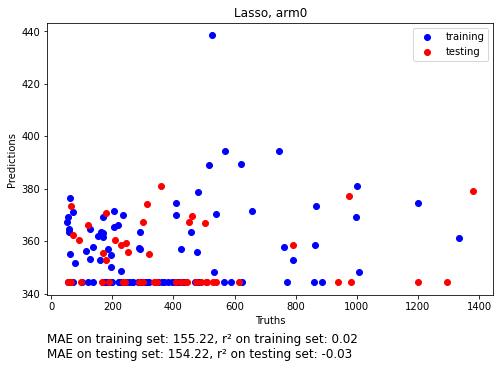

In [14]:
from sklearn.metrics import median_absolute_error, r2_score

arm0_y_train_pred = model.predict(arm0_x_train)
mae_train = median_absolute_error(arm0_y_train, arm0_y_train_pred)
r2_train = r2_score(arm0_y_train, arm0_y_train_pred)
score = f"MAE on training set: {mae_train:.2f}, r² on training set: {r2_train:.2f}"

fig, ax = plt.subplots(figsize=(8, 5))
plt.scatter(arm0_y_train, arm0_y_train_pred, c="blue", label="training")
plt.title("Lasso, arm0")
plt.ylabel("Predictions")
plt.xlabel("Truths")

arm0_y_pred = model.predict(arm0_x_test)
mae = median_absolute_error(arm0_y_test, arm0_y_pred)
r2 = r2_score(arm0_y_test, arm0_y_pred)
score += f"\nMAE on testing set: {mae:.2f}, r² on testing set: {r2:.2f}"

plt.scatter(arm0_y_test, arm0_y_pred, c="red", label="testing")
plt.figtext(0.125, -0.05, score, fontsize=12)
ax.legend()
plt.show()

evaluation["best-lasso"]["arm0"] = [(mae_train, r2_train), (mae, r2)]

In [15]:
arm0_best_coefs = pd.DataFrame(
    model.coef_, columns=["Coefficients"], index=arm0_x_train.columns
)
arm0_best_coefs

,Coefficients
CellCycle,-0.000000
HIPPO,-0.000000
MYC,0.000000
NOTCH,-0.000000
NRF2,0.000000
PI3K,4.546551
RTK-RAS,-0.000000
TGF-Beta,-0.000000
TP53,-0.000000
WNT,0.000000


#### arm1

In [16]:
_ = model.fit(arm1_x_train, arm1_y_train)

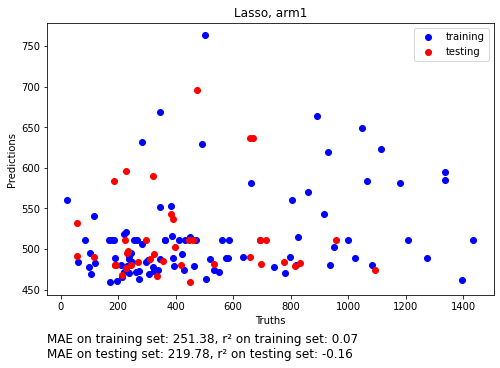

In [17]:
arm1_y_train_pred = model.predict(arm1_x_train)
mae_train = median_absolute_error(arm1_y_train, arm1_y_train_pred)
r2_train = r2_score(arm1_y_train, arm1_y_train_pred)
score = f"MAE on training set: {mae_train:.2f}, r² on training set: {r2_train:.2f}"

fig, ax = plt.subplots(figsize=(8, 5))
plt.scatter(arm1_y_train, arm1_y_train_pred, c="blue", label="training")
plt.title("Lasso, arm1")
plt.ylabel("Predictions")
plt.xlabel("Truths")

arm1_y_pred = model.predict(arm1_x_test)
mae = median_absolute_error(arm1_y_test, arm1_y_pred)
r2 = r2_score(arm1_y_test, arm1_y_pred)
score += f"\nMAE on testing set: {mae:.2f}, r² on testing set: {r2:.2f}"

plt.scatter(arm1_y_test, arm1_y_pred, c="red", label="testing")
plt.figtext(0.125, -0.05, score, fontsize=12)
ax.legend()
plt.show()

evaluation["best-lasso"]["arm1"] = [(mae_train, r2_train), (mae, r2)]

In [18]:
arm1_best_coefs = pd.DataFrame(
    model.coef_, columns=["Coefficients"], index=arm1_x_train.columns
)
arm1_best_coefs

,Coefficients
CellCycle,-1.247079
HIPPO,0.000000
MYC,-0.000000
NOTCH,0.000000
NRF2,0.000000
PI3K,8.934564
RTK-RAS,0.000000
TGF-Beta,-0.000000
TP53,0.678723
WNT,0.000000


### Random forest

In [19]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(criterion="mae")
evaluation["best-random-forest"] = {}

#### arm0

In [20]:
_ = model.fit(arm0_x_train, arm0_y_train)

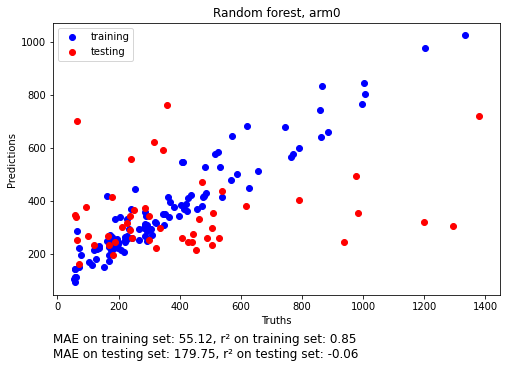

In [21]:
from sklearn.metrics import median_absolute_error, r2_score

arm0_y_train_pred = model.predict(arm0_x_train)
mae_train = median_absolute_error(arm0_y_train, arm0_y_train_pred)
r2_train = r2_score(arm0_y_train, arm0_y_train_pred)
score = f"MAE on training set: {mae_train:.2f}, r² on training set: {r2_train:.2f}"

fig, ax = plt.subplots(figsize=(8, 5))
plt.scatter(arm0_y_train, arm0_y_train_pred, c="blue", label="training")
plt.title("Random forest, arm0")
plt.ylabel("Predictions")
plt.xlabel("Truths")

arm0_y_pred = model.predict(arm0_x_test)
mae = median_absolute_error(arm0_y_test, arm0_y_pred)
r2 = r2_score(arm0_y_test, arm0_y_pred)
score += f"\nMAE on testing set: {mae:.2f}, r² on testing set: {r2:.2f}"

plt.scatter(arm0_y_test, arm0_y_pred, c="red", label="testing")
plt.figtext(0.125, -0.05, score, fontsize=12)
ax.legend()
plt.show()

evaluation["best-random-forest"]["arm0"] = [(mae_train, r2_train), (mae, r2)]

#### arm1

In [22]:
_ = model.fit(arm1_x_train, arm1_y_train)

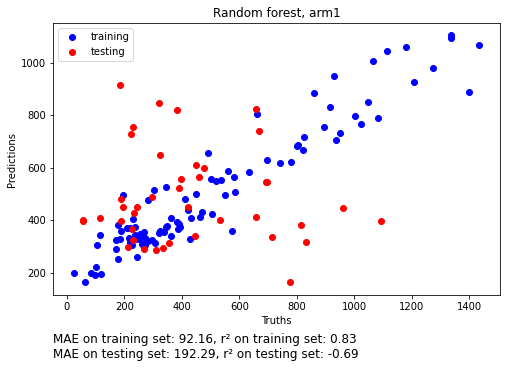

In [23]:
arm1_y_train_pred = model.predict(arm1_x_train)
mae_train = median_absolute_error(arm1_y_train, arm1_y_train_pred)
r2_train = r2_score(arm1_y_train, arm1_y_train_pred)
score = f"MAE on training set: {mae_train:.2f}, r² on training set: {r2_train:.2f}"

fig, ax = plt.subplots(figsize=(8, 5))
plt.scatter(arm1_y_train, arm1_y_train_pred, c="blue", label="training")
plt.title("Random forest, arm1")
plt.ylabel("Predictions")
plt.xlabel("Truths")

arm1_y_pred = model.predict(arm1_x_test)
mae = median_absolute_error(arm1_y_test, arm1_y_pred)
r2 = r2_score(arm1_y_test, arm1_y_pred)
score += f"\nMAE on testing set: {mae:.2f}, r² on testing set: {r2:.2f}"

plt.scatter(arm1_y_test, arm1_y_pred, c="red", label="testing")
plt.figtext(0.125, -0.05, score, fontsize=12)
ax.legend()
plt.show()

evaluation["best-random-forest"]["arm1"] = [(mae_train, r2_train), (mae, r2)]

### Decision tree

In [24]:
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor(criterion="mae", max_depth=10)
evaluation["best-decision-tree"] = {}

#### arm0

In [25]:
_ = model.fit(arm0_x_train, arm0_y_train)

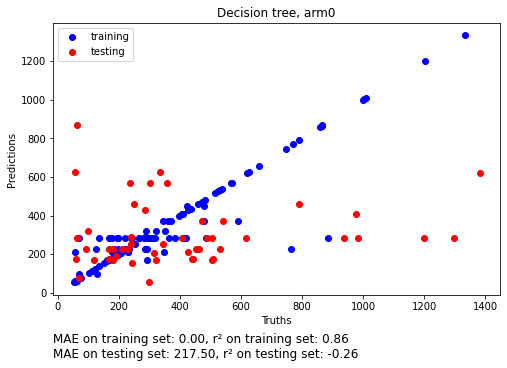

In [26]:
from sklearn.metrics import median_absolute_error, r2_score

arm0_y_train_pred = model.predict(arm0_x_train)
mae_train = median_absolute_error(arm0_y_train, arm0_y_train_pred)
r2_train = r2_score(arm0_y_train, arm0_y_train_pred)
score = f"MAE on training set: {mae_train:.2f}, r² on training set: {r2_train:.2f}"

fig, ax = plt.subplots(figsize=(8, 5))
plt.scatter(arm0_y_train, arm0_y_train_pred, c="blue", label="training")
plt.title("Decision tree, arm0")
plt.ylabel("Predictions")
plt.xlabel("Truths")

arm0_y_pred = model.predict(arm0_x_test)
mae = median_absolute_error(arm0_y_test, arm0_y_pred)
r2 = r2_score(arm0_y_test, arm0_y_pred)
score += f"\nMAE on testing set: {mae:.2f}, r² on testing set: {r2:.2f}"

plt.scatter(arm0_y_test, arm0_y_pred, c="red", label="testing")
plt.figtext(0.125, -0.05, score, fontsize=12)
ax.legend()
plt.show()

evaluation["best-decision-tree"]["arm0"] = [(mae_train, r2_train), (mae, r2)]

#### arm1

In [27]:
_ = model.fit(arm1_x_train, arm1_y_train)

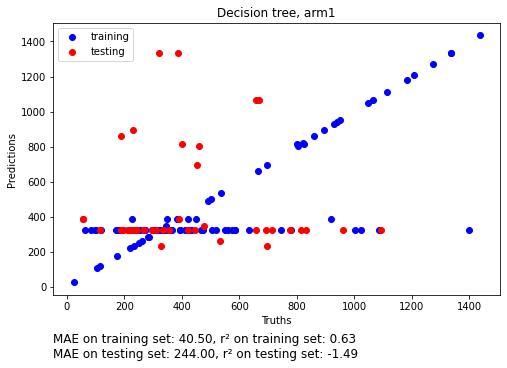

In [28]:
arm1_y_train_pred = model.predict(arm1_x_train)
mae_train = median_absolute_error(arm1_y_train, arm1_y_train_pred)
r2_train = r2_score(arm1_y_train, arm1_y_train_pred)
score = f"MAE on training set: {mae_train:.2f}, r² on training set: {r2_train:.2f}"

fig, ax = plt.subplots(figsize=(8, 5))
plt.scatter(arm1_y_train, arm1_y_train_pred, c="blue", label="training")
plt.title("Decision tree, arm1")
plt.ylabel("Predictions")
plt.xlabel("Truths")

arm1_y_pred = model.predict(arm1_x_test)
mae = median_absolute_error(arm1_y_test, arm1_y_pred)
r2 = r2_score(arm1_y_test, arm1_y_pred)
score += f"\nMAE on testing set: {mae:.2f}, r² on testing set: {r2:.2f}"

plt.scatter(arm1_y_test, arm1_y_pred, c="red", label="testing")
plt.figtext(0.125, -0.05, score, fontsize=12)
ax.legend()
plt.show()

evaluation["best-decision-tree"]["arm1"] = [(mae_train, r2_train), (mae, r2)]

### Support vector regression

In [29]:
from sklearn.svm import SVR

model = SVR(kernel="poly")
evaluation["best-svr-poly"] = {}

#### arm0

In [30]:
_ = model.fit(arm0_x_train, arm0_y_train)

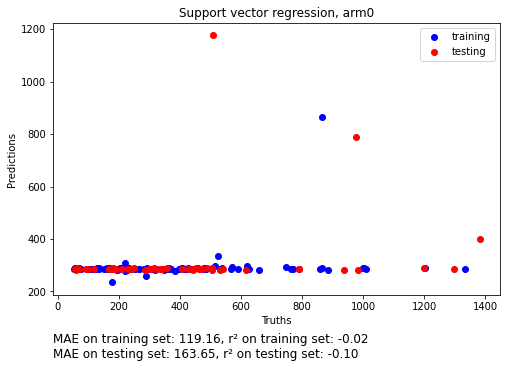

In [31]:
from sklearn.metrics import median_absolute_error, r2_score

arm0_y_train_pred = model.predict(arm0_x_train)
mae_train = median_absolute_error(arm0_y_train, arm0_y_train_pred)
r2_train = r2_score(arm0_y_train, arm0_y_train_pred)
score = f"MAE on training set: {mae_train:.2f}, r² on training set: {r2_train:.2f}"

fig, ax = plt.subplots(figsize=(8, 5))
plt.scatter(arm0_y_train, arm0_y_train_pred, c="blue", label="training")
plt.title("Support vector regression, arm0")
plt.ylabel("Predictions")
plt.xlabel("Truths")

arm0_y_pred = model.predict(arm0_x_test)
mae = median_absolute_error(arm0_y_test, arm0_y_pred)
r2 = r2_score(arm0_y_test, arm0_y_pred)
score += f"\nMAE on testing set: {mae:.2f}, r² on testing set: {r2:.2f}"

plt.scatter(arm0_y_test, arm0_y_pred, c="red", label="testing")
plt.figtext(0.125, -0.05, score, fontsize=12)
ax.legend()
plt.show()

evaluation["best-svr-poly"]["arm0"] = [(mae_train, r2_train), (mae, r2)]

#### arm1

In [32]:
_ = model.fit(arm1_x_train, arm1_y_train)

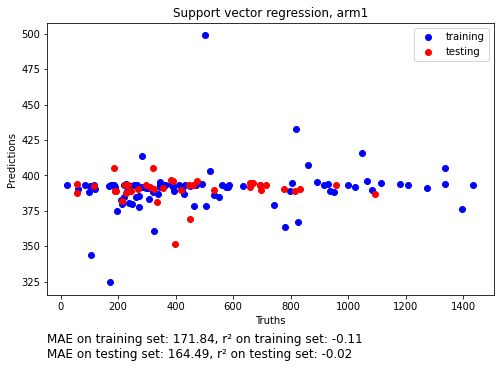

In [33]:
arm1_y_train_pred = model.predict(arm1_x_train)
mae_train = median_absolute_error(arm1_y_train, arm1_y_train_pred)
r2_train = r2_score(arm1_y_train, arm1_y_train_pred)
score = f"MAE on training set: {mae_train:.2f}, r² on training set: {r2_train:.2f}"

fig, ax = plt.subplots(figsize=(8, 5))
plt.scatter(arm1_y_train, arm1_y_train_pred, c="blue", label="training")
plt.title("Support vector regression, arm1")
plt.ylabel("Predictions")
plt.xlabel("Truths")

arm1_y_pred = model.predict(arm1_x_test)
mae = median_absolute_error(arm1_y_test, arm1_y_pred)
r2 = r2_score(arm1_y_test, arm1_y_pred)
score += f"\nMAE on testing set: {mae:.2f}, r² on testing set: {r2:.2f}"

plt.scatter(arm1_y_test, arm1_y_pred, c="red", label="testing")
plt.figtext(0.125, -0.05, score, fontsize=12)
ax.legend()
plt.show()

evaluation["best-svr-poly"]["arm1"] = [(mae_train, r2_train), (mae, r2)]

## Using all mutation measures

In [34]:
arm0_all_dataset = pd.read_csv("arm0_all_mutations.csv")
arm1_all_dataset = pd.read_csv("arm1_all_mutations.csv")

In [35]:
from sklearn.model_selection import train_test_split

arm0_x, arm0_y = (
    arm0_all_dataset.drop(["dpfs", "PatientFirstName"], axis="columns"),
    arm0_all_dataset["dpfs"],
)
arm0_x_train, arm0_x_test, arm0_y_train, arm0_y_test = train_test_split(
    arm0_x, arm0_y, test_size=0.30, random_state=42
)

arm1_x, arm1_y = (
    arm1_all_dataset.drop(["dpfs", "PatientFirstName"], axis="columns"),
    arm1_all_dataset["dpfs"],
)
arm1_x_train, arm1_x_test, arm1_y_train, arm1_y_test = train_test_split(
    arm1_x, arm1_y, test_size=0.30, random_state=42
)

### Linear model

In [36]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
evaluation["all-linear"] = {}

#### arm0

In [37]:
_ = model.fit(arm0_x_train, arm0_y_train)

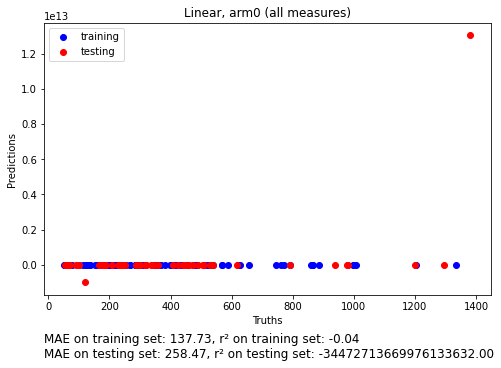

In [38]:
from sklearn.metrics import median_absolute_error, r2_score

arm0_y_train_pred = model.predict(arm0_x_train)
mae_train = median_absolute_error(arm0_y_train, arm0_y_train_pred)
r2_train = r2_score(arm0_y_train, arm0_y_train_pred)
score = f"MAE on training set: {mae_train:.2f}, r² on training set: {r2_train:.2f}"

fig, ax = plt.subplots(figsize=(8, 5))
plt.scatter(arm0_y_train, arm0_y_train_pred, c="blue", label="training")
plt.title("Linear, arm0 (all measures)")
plt.ylabel("Predictions")
plt.xlabel("Truths")

arm0_y_pred = model.predict(arm0_x_test)
mae = median_absolute_error(arm0_y_test, arm0_y_pred)
r2 = r2_score(arm0_y_test, arm0_y_pred)
score += f"\nMAE on testing set: {mae:.2f}, r² on testing set: {r2:.2f}"

plt.scatter(arm0_y_test, arm0_y_pred, c="red", label="testing")
plt.figtext(0.125, -0.05, score, fontsize=12)
ax.legend()
plt.show()

evaluation["all-linear"]["arm0"] = [(mae_train, r2_train), (mae, r2)]

In [39]:
arm0_all_coefs = pd.DataFrame(
    model.coef_, columns=["Coefficients"], index=arm0_x_train.columns
)
arm0_all_coefs

,Coefficients
CellCycle,-1.840922e+14
HIPPO,-1.283829e+13
MYC,9.527836e+11
NOTCH,1.708821e+13
NRF2,1.034345e+13
...,...
eigenvector_centrality_numpy_H_PI3K,-3.809835e+13
eigenvector_centrality_numpy_H_RTK-RAS,4.958642e+12
eigenvector_centrality_numpy_H_TGF-Beta,1.757531e+13
eigenvector_centrality_numpy_H_TP53,-2.065436e+14


#### arm1

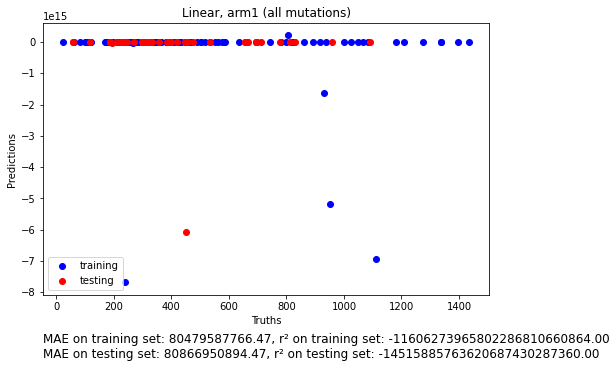

In [40]:
arm1_y_train_pred = model.predict(arm1_x_train)
mae_train = median_absolute_error(arm1_y_train, arm1_y_train_pred)
r2_train = r2_score(arm1_y_train, arm1_y_train_pred)
score = f"MAE on training set: {mae_train:.2f}, r² on training set: {r2_train:.2f}"

fig, ax = plt.subplots(figsize=(8, 5))
plt.scatter(arm1_y_train, arm1_y_train_pred, c="blue", label="training")
plt.title("Linear, arm1 (all mutations)")
plt.ylabel("Predictions")
plt.xlabel("Truths")

arm1_y_pred = model.predict(arm1_x_test)
mae = median_absolute_error(arm1_y_test, arm1_y_pred)
r2 = r2_score(arm1_y_test, arm1_y_pred)
score += f"\nMAE on testing set: {mae:.2f}, r² on testing set: {r2:.2f}"

plt.scatter(arm1_y_test, arm1_y_pred, c="red", label="testing")
plt.figtext(0.125, -0.05, score, fontsize=12)
ax.legend()
plt.show()

evaluation["all-linear"]["arm1"] = [(mae_train, r2_train), (mae, r2)]

### Lasso

In [41]:
from sklearn.linear_model import LassoCV

model = LassoCV()
evaluation["all-lasso"] = {}

#### arm0

In [42]:
_ = model.fit(arm0_x_train, arm0_y_train)

/opt/jupyter/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1307.6765940627083, tolerance: 614.2748622222224
  model = cd_fast.enet_coordinate_descent(
/opt/jupyter/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1696.5642056511715, tolerance: 614.2748622222224
  model = cd_fast.enet_coordinate_descent(
/opt/jupyter/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 11164.239248895552, tolerance: 614.2748622222224
  model = cd_fast.enet_coordinate_descent(
/opt/jupyter/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Ob

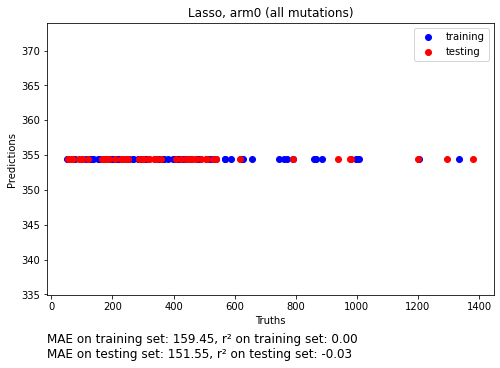

In [43]:
from sklearn.metrics import median_absolute_error, r2_score

arm0_y_train_pred = model.predict(arm0_x_train)
mae_train = median_absolute_error(arm0_y_train, arm0_y_train_pred)
r2_train = r2_score(arm0_y_train, arm0_y_train_pred)
score = f"MAE on training set: {mae_train:.2f}, r² on training set: {r2_train:.2f}"

fig, ax = plt.subplots(figsize=(8, 5))
plt.scatter(arm0_y_train, arm0_y_train_pred, c="blue", label="training")
plt.title("Lasso, arm0 (all mutations)")
plt.ylabel("Predictions")
plt.xlabel("Truths")

arm0_y_pred = model.predict(arm0_x_test)
mae = median_absolute_error(arm0_y_test, arm0_y_pred)
r2 = r2_score(arm0_y_test, arm0_y_pred)
score += f"\nMAE on testing set: {mae:.2f}, r² on testing set: {r2:.2f}"

plt.scatter(arm0_y_test, arm0_y_pred, c="red", label="testing")
plt.figtext(0.125, -0.05, score, fontsize=12)
ax.legend()
plt.show()

evaluation["all-lasso"]["arm0"] = [(mae_train, r2_train), (mae, r2)]

In [44]:
arm0_best_coefs = pd.DataFrame(
    model.coef_, columns=["Coefficients"], index=arm0_x_train.columns
)
arm0_best_coefs

,Coefficients
CellCycle,-0.0
HIPPO,-0.0
MYC,0.0
NOTCH,-0.0
NRF2,0.0
...,...
eigenvector_centrality_numpy_H_PI3K,0.0
eigenvector_centrality_numpy_H_RTK-RAS,-0.0
eigenvector_centrality_numpy_H_TGF-Beta,-0.0
eigenvector_centrality_numpy_H_TP53,-0.0


#### arm1

In [45]:
_ = model.fit(arm1_x_train, arm1_y_train)

/opt/jupyter/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1036.2915703244507, tolerance: 960.996595945946
  model = cd_fast.enet_coordinate_descent(
/opt/jupyter/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2072.7602969119325, tolerance: 926.8730648648648
  model = cd_fast.enet_coordinate_descent(
/opt/jupyter/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5271.357878815383, tolerance: 926.8730648648648
  model = cd_fast.enet_coordinate_descent(
/opt/jupyter/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Obje

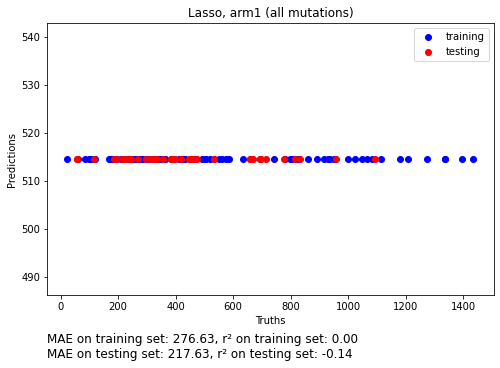

In [46]:
arm1_y_train_pred = model.predict(arm1_x_train)
mae_train = median_absolute_error(arm1_y_train, arm1_y_train_pred)
r2_train = r2_score(arm1_y_train, arm1_y_train_pred)
score = f"MAE on training set: {mae_train:.2f}, r² on training set: {r2_train:.2f}"

fig, ax = plt.subplots(figsize=(8, 5))
plt.scatter(arm1_y_train, arm1_y_train_pred, c="blue", label="training")
plt.title("Lasso, arm1 (all mutations)")
plt.ylabel("Predictions")
plt.xlabel("Truths")

arm1_y_pred = model.predict(arm1_x_test)
mae = median_absolute_error(arm1_y_test, arm1_y_pred)
r2 = r2_score(arm1_y_test, arm1_y_pred)
score += f"\nMAE on testing set: {mae:.2f}, r² on testing set: {r2:.2f}"

plt.scatter(arm1_y_test, arm1_y_pred, c="red", label="testing")
plt.figtext(0.125, -0.05, score, fontsize=12)
ax.legend()
plt.show()

evaluation["all-lasso"]["arm1"] = [(mae_train, r2_train), (mae, r2)]

In [47]:
arm1_best_coefs = pd.DataFrame(
    model.coef_, columns=["Coefficients"], index=arm1_x_train.columns
)
arm1_best_coefs

,Coefficients
CellCycle,-0.0
HIPPO,0.0
MYC,-0.0
NOTCH,0.0
NRF2,0.0
...,...
eigenvector_centrality_numpy_H_PI3K,0.0
eigenvector_centrality_numpy_H_RTK-RAS,0.0
eigenvector_centrality_numpy_H_TGF-Beta,-0.0
eigenvector_centrality_numpy_H_TP53,-0.0


### Random forest

In [48]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(criterion="mae")
evaluation["all-random-forest"] = {}

#### arm0

In [49]:
_ = model.fit(arm0_x_train, arm0_y_train)

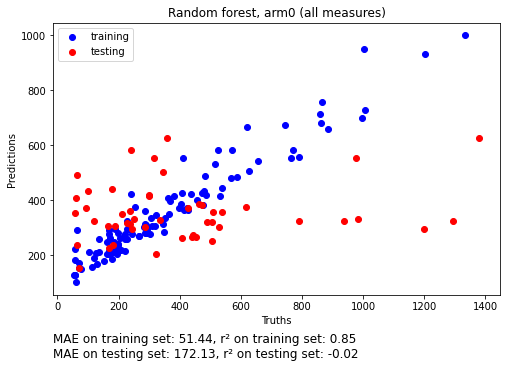

In [50]:
from sklearn.metrics import median_absolute_error, r2_score

arm0_y_train_pred = model.predict(arm0_x_train)
mae_train = median_absolute_error(arm0_y_train, arm0_y_train_pred)
r2_train = r2_score(arm0_y_train, arm0_y_train_pred)
score = f"MAE on training set: {mae_train:.2f}, r² on training set: {r2_train:.2f}"

fig, ax = plt.subplots(figsize=(8, 5))
plt.scatter(arm0_y_train, arm0_y_train_pred, c="blue", label="training")
plt.title("Random forest, arm0 (all measures)")
plt.ylabel("Predictions")
plt.xlabel("Truths")

arm0_y_pred = model.predict(arm0_x_test)
mae = median_absolute_error(arm0_y_test, arm0_y_pred)
r2 = r2_score(arm0_y_test, arm0_y_pred)
score += f"\nMAE on testing set: {mae:.2f}, r² on testing set: {r2:.2f}"

plt.scatter(arm0_y_test, arm0_y_pred, c="red", label="testing")
plt.figtext(0.125, -0.05, score, fontsize=12)
ax.legend()
plt.show()

evaluation["all-random-forest"]["arm0"] = [(mae_train, r2_train), (mae, r2)]

#### arm1

In [51]:
_ = model.fit(arm1_x_train, arm1_y_train)

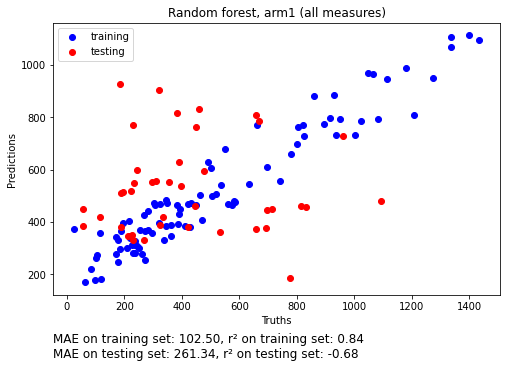

In [52]:
arm1_y_train_pred = model.predict(arm1_x_train)
mae_train = median_absolute_error(arm1_y_train, arm1_y_train_pred)
r2_train = r2_score(arm1_y_train, arm1_y_train_pred)
score = f"MAE on training set: {mae_train:.2f}, r² on training set: {r2_train:.2f}"

fig, ax = plt.subplots(figsize=(8, 5))
plt.scatter(arm1_y_train, arm1_y_train_pred, c="blue", label="training")
plt.title("Random forest, arm1 (all measures)")
plt.ylabel("Predictions")
plt.xlabel("Truths")

arm1_y_pred = model.predict(arm1_x_test)
mae = median_absolute_error(arm1_y_test, arm1_y_pred)
r2 = r2_score(arm1_y_test, arm1_y_pred)
score += f"\nMAE on testing set: {mae:.2f}, r² on testing set: {r2:.2f}"

plt.scatter(arm1_y_test, arm1_y_pred, c="red", label="testing")
plt.figtext(0.125, -0.05, score, fontsize=12)
ax.legend()
plt.show()

evaluation["all-random-forest"]["arm1"] = [(mae_train, r2_train), (mae, r2)]

### Decision tree

In [53]:
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor(criterion="mae", max_depth=10)
evaluation["all-decision-tree"] = {}

#### arm0

In [54]:
_ = model.fit(arm0_x_train, arm0_y_train)

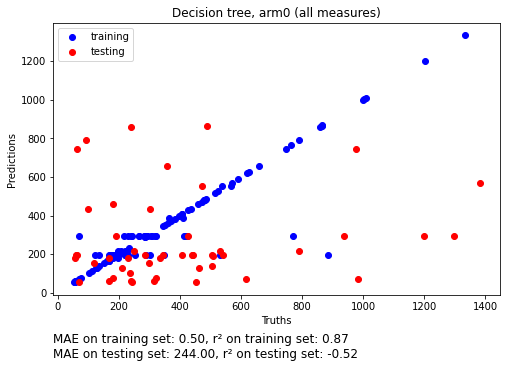

In [55]:
from sklearn.metrics import median_absolute_error, r2_score

arm0_y_train_pred = model.predict(arm0_x_train)
mae_train = median_absolute_error(arm0_y_train, arm0_y_train_pred)
r2_train = r2_score(arm0_y_train, arm0_y_train_pred)
score = f"MAE on training set: {mae_train:.2f}, r² on training set: {r2_train:.2f}"

fig, ax = plt.subplots(figsize=(8, 5))
plt.scatter(arm0_y_train, arm0_y_train_pred, c="blue", label="training")
plt.title("Decision tree, arm0 (all measures)")
plt.ylabel("Predictions")
plt.xlabel("Truths")

arm0_y_pred = model.predict(arm0_x_test)
mae = median_absolute_error(arm0_y_test, arm0_y_pred)
r2 = r2_score(arm0_y_test, arm0_y_pred)
score += f"\nMAE on testing set: {mae:.2f}, r² on testing set: {r2:.2f}"

plt.scatter(arm0_y_test, arm0_y_pred, c="red", label="testing")
plt.figtext(0.125, -0.05, score, fontsize=12)
ax.legend()
plt.show()

evaluation["all-decision-tree"]["arm0"] = [(mae_train, r2_train), (mae, r2)]

#### arm1

In [56]:
_ = model.fit(arm1_x_train, arm1_y_train)

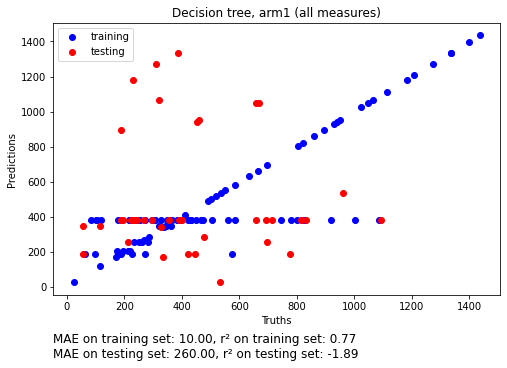

In [57]:
arm1_y_train_pred = model.predict(arm1_x_train)
mae_train = median_absolute_error(arm1_y_train, arm1_y_train_pred)
r2_train = r2_score(arm1_y_train, arm1_y_train_pred)
score = f"MAE on training set: {mae_train:.2f}, r² on training set: {r2_train:.2f}"

fig, ax = plt.subplots(figsize=(8, 5))
plt.scatter(arm1_y_train, arm1_y_train_pred, c="blue", label="training")
plt.title("Decision tree, arm1 (all measures)")
plt.ylabel("Predictions")
plt.xlabel("Truths")

arm1_y_pred = model.predict(arm1_x_test)
mae = median_absolute_error(arm1_y_test, arm1_y_pred)
r2 = r2_score(arm1_y_test, arm1_y_pred)
score += f"\nMAE on testing set: {mae:.2f}, r² on testing set: {r2:.2f}"

plt.scatter(arm1_y_test, arm1_y_pred, c="red", label="testing")
plt.figtext(0.125, -0.05, score, fontsize=12)
ax.legend()
plt.show()

evaluation["all-decision-tree"]["arm1"] = [(mae_train, r2_train), (mae, r2)]

### Support vector regression

In [58]:
from sklearn.svm import SVR

model = SVR(kernel="poly")
evaluation["all-svr-poly"] = {}

#### arm0

In [59]:
_ = model.fit(arm0_x_train, arm0_y_train)

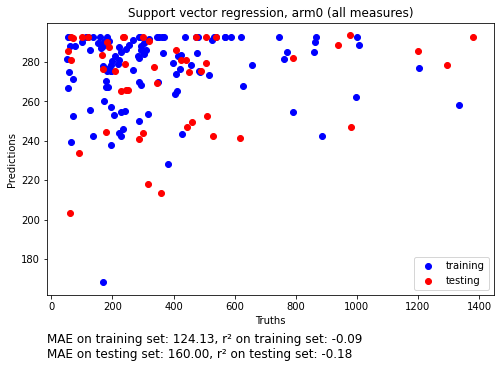

In [60]:
from sklearn.metrics import median_absolute_error, r2_score

arm0_y_train_pred = model.predict(arm0_x_train)
mae_train = median_absolute_error(arm0_y_train, arm0_y_train_pred)
r2_train = r2_score(arm0_y_train, arm0_y_train_pred)
score = f"MAE on training set: {mae_train:.2f}, r² on training set: {r2_train:.2f}"

fig, ax = plt.subplots(figsize=(8, 5))
plt.scatter(arm0_y_train, arm0_y_train_pred, c="blue", label="training")
plt.title("Support vector regression, arm0 (all measures)")
plt.ylabel("Predictions")
plt.xlabel("Truths")

arm0_y_pred = model.predict(arm0_x_test)
mae = median_absolute_error(arm0_y_test, arm0_y_pred)
r2 = r2_score(arm0_y_test, arm0_y_pred)
score += f"\nMAE on testing set: {mae:.2f}, r² on testing set: {r2:.2f}"

plt.scatter(arm0_y_test, arm0_y_pred, c="red", label="testing")
plt.figtext(0.125, -0.05, score, fontsize=12)
ax.legend()
plt.show()

evaluation["all-svr-poly"]["arm0"] = [(mae_train, r2_train), (mae, r2)]

#### arm1

In [61]:
_ = model.fit(arm1_x_train, arm1_y_train)

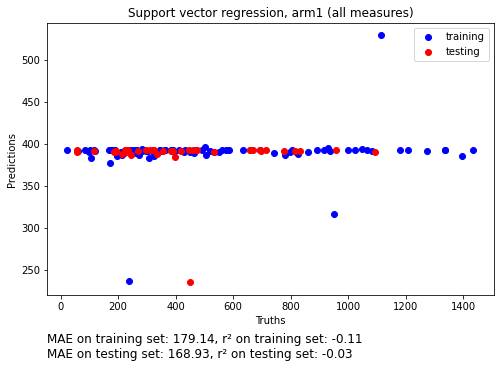

In [62]:
arm1_y_train_pred = model.predict(arm1_x_train)
mae_train = median_absolute_error(arm1_y_train, arm1_y_train_pred)
r2_train = r2_score(arm1_y_train, arm1_y_train_pred)
score = f"MAE on training set: {mae_train:.2f}, r² on training set: {r2_train:.2f}"

fig, ax = plt.subplots(figsize=(8, 5))
plt.scatter(arm1_y_train, arm1_y_train_pred, c="blue", label="training")
plt.title("Support vector regression, arm1 (all measures)")
plt.ylabel("Predictions")
plt.xlabel("Truths")

arm1_y_pred = model.predict(arm1_x_test)
mae = median_absolute_error(arm1_y_test, arm1_y_pred)
r2 = r2_score(arm1_y_test, arm1_y_pred)
score += f"\nMAE on testing set: {mae:.2f}, r² on testing set: {r2:.2f}"

plt.scatter(arm1_y_test, arm1_y_pred, c="red", label="testing")
plt.figtext(0.125, -0.05, score, fontsize=12)
ax.legend()
plt.show()

evaluation["all-svr-poly"]["arm1"] = [(mae_train, r2_train), (mae, r2)]

## Analyzing clinical data
Now for a different course of action: let's try to build a model on top of clinical parameters, which can later be combined with the pathway mutations for (hopefully) better results.

In [63]:
clinical = pd.read_csv("TRIBE2_db.csv")
clinical_a0 = clinical[clinical["arm"] == 0][
    [
        "age @random",
        "tstag",
        "nstag",
        "liver",
        "lung",
        "nodes",
        "peritoneum",
        "other",
        "ras",
        "braf",
        "dpfs",
    ]
]
clinical_a1 = clinical[clinical["arm"] == 1][
    [
        "age @random",
        "tstag",
        "nstag",
        "liver",
        "lung",
        "nodes",
        "peritoneum",
        "other",
        "ras",
        "braf",
        "dpfs",
    ]
]

# Dataset contains null values, encoded in all sort of ways..
clinical_a0 = clinical_a0[
    (clinical_a0["tstag"] != -99)
    & (clinical_a0["nstag"] != -99)
    & (clinical_a0["tstag"] != -99)
    & (clinical_a0["liver"] != -99)
    & (clinical_a0["lung"] != -99)
    & (clinical_a0["peritoneum"] != -99)
    & (clinical_a0["other"] != -99)
    & (clinical_a0["ras"].isin([0, 1]))
    & (clinical_a0["braf"].isin([0, 1]))
]
clinical_a1 = clinical_a1[
    (clinical_a1["tstag"] != -99)
    & (clinical_a1["nstag"] != -99)
    & (clinical_a1["tstag"] != -99)
    & (clinical_a1["liver"] != -99)
    & (clinical_a1["lung"] != -99)
    & (clinical_a1["peritoneum"] != -99)
    & (clinical_a1["other"] != -99)
    & (clinical_a1["ras"].isin([0, 1]))
    & (clinical_a1["braf"].isin([0, 1]))
]

In [64]:
c0_x, c0_y = (
    clinical_a0.drop("dpfs", axis="columns"),
    clinical_a0["dpfs"],
)
c0_x_train, c0_x_test, c0_y_train, c0_y_test = train_test_split(
    c0_x, c0_y, test_size=0.30, random_state=42
)

c1_x, c1_y = (
    clinical_a1.drop("dpfs", axis="columns"),
    clinical_a1["dpfs"],
)
c1_x_train, c1_x_test, c1_y_train, c1_y_test = train_test_split(
    c1_x, c1_y, test_size=0.30, random_state=42
)

### Data visualization
As can be seen from the plots below, dpfs has a long tail so it would make sense to take its log and turn it into an approximately normal distribution.

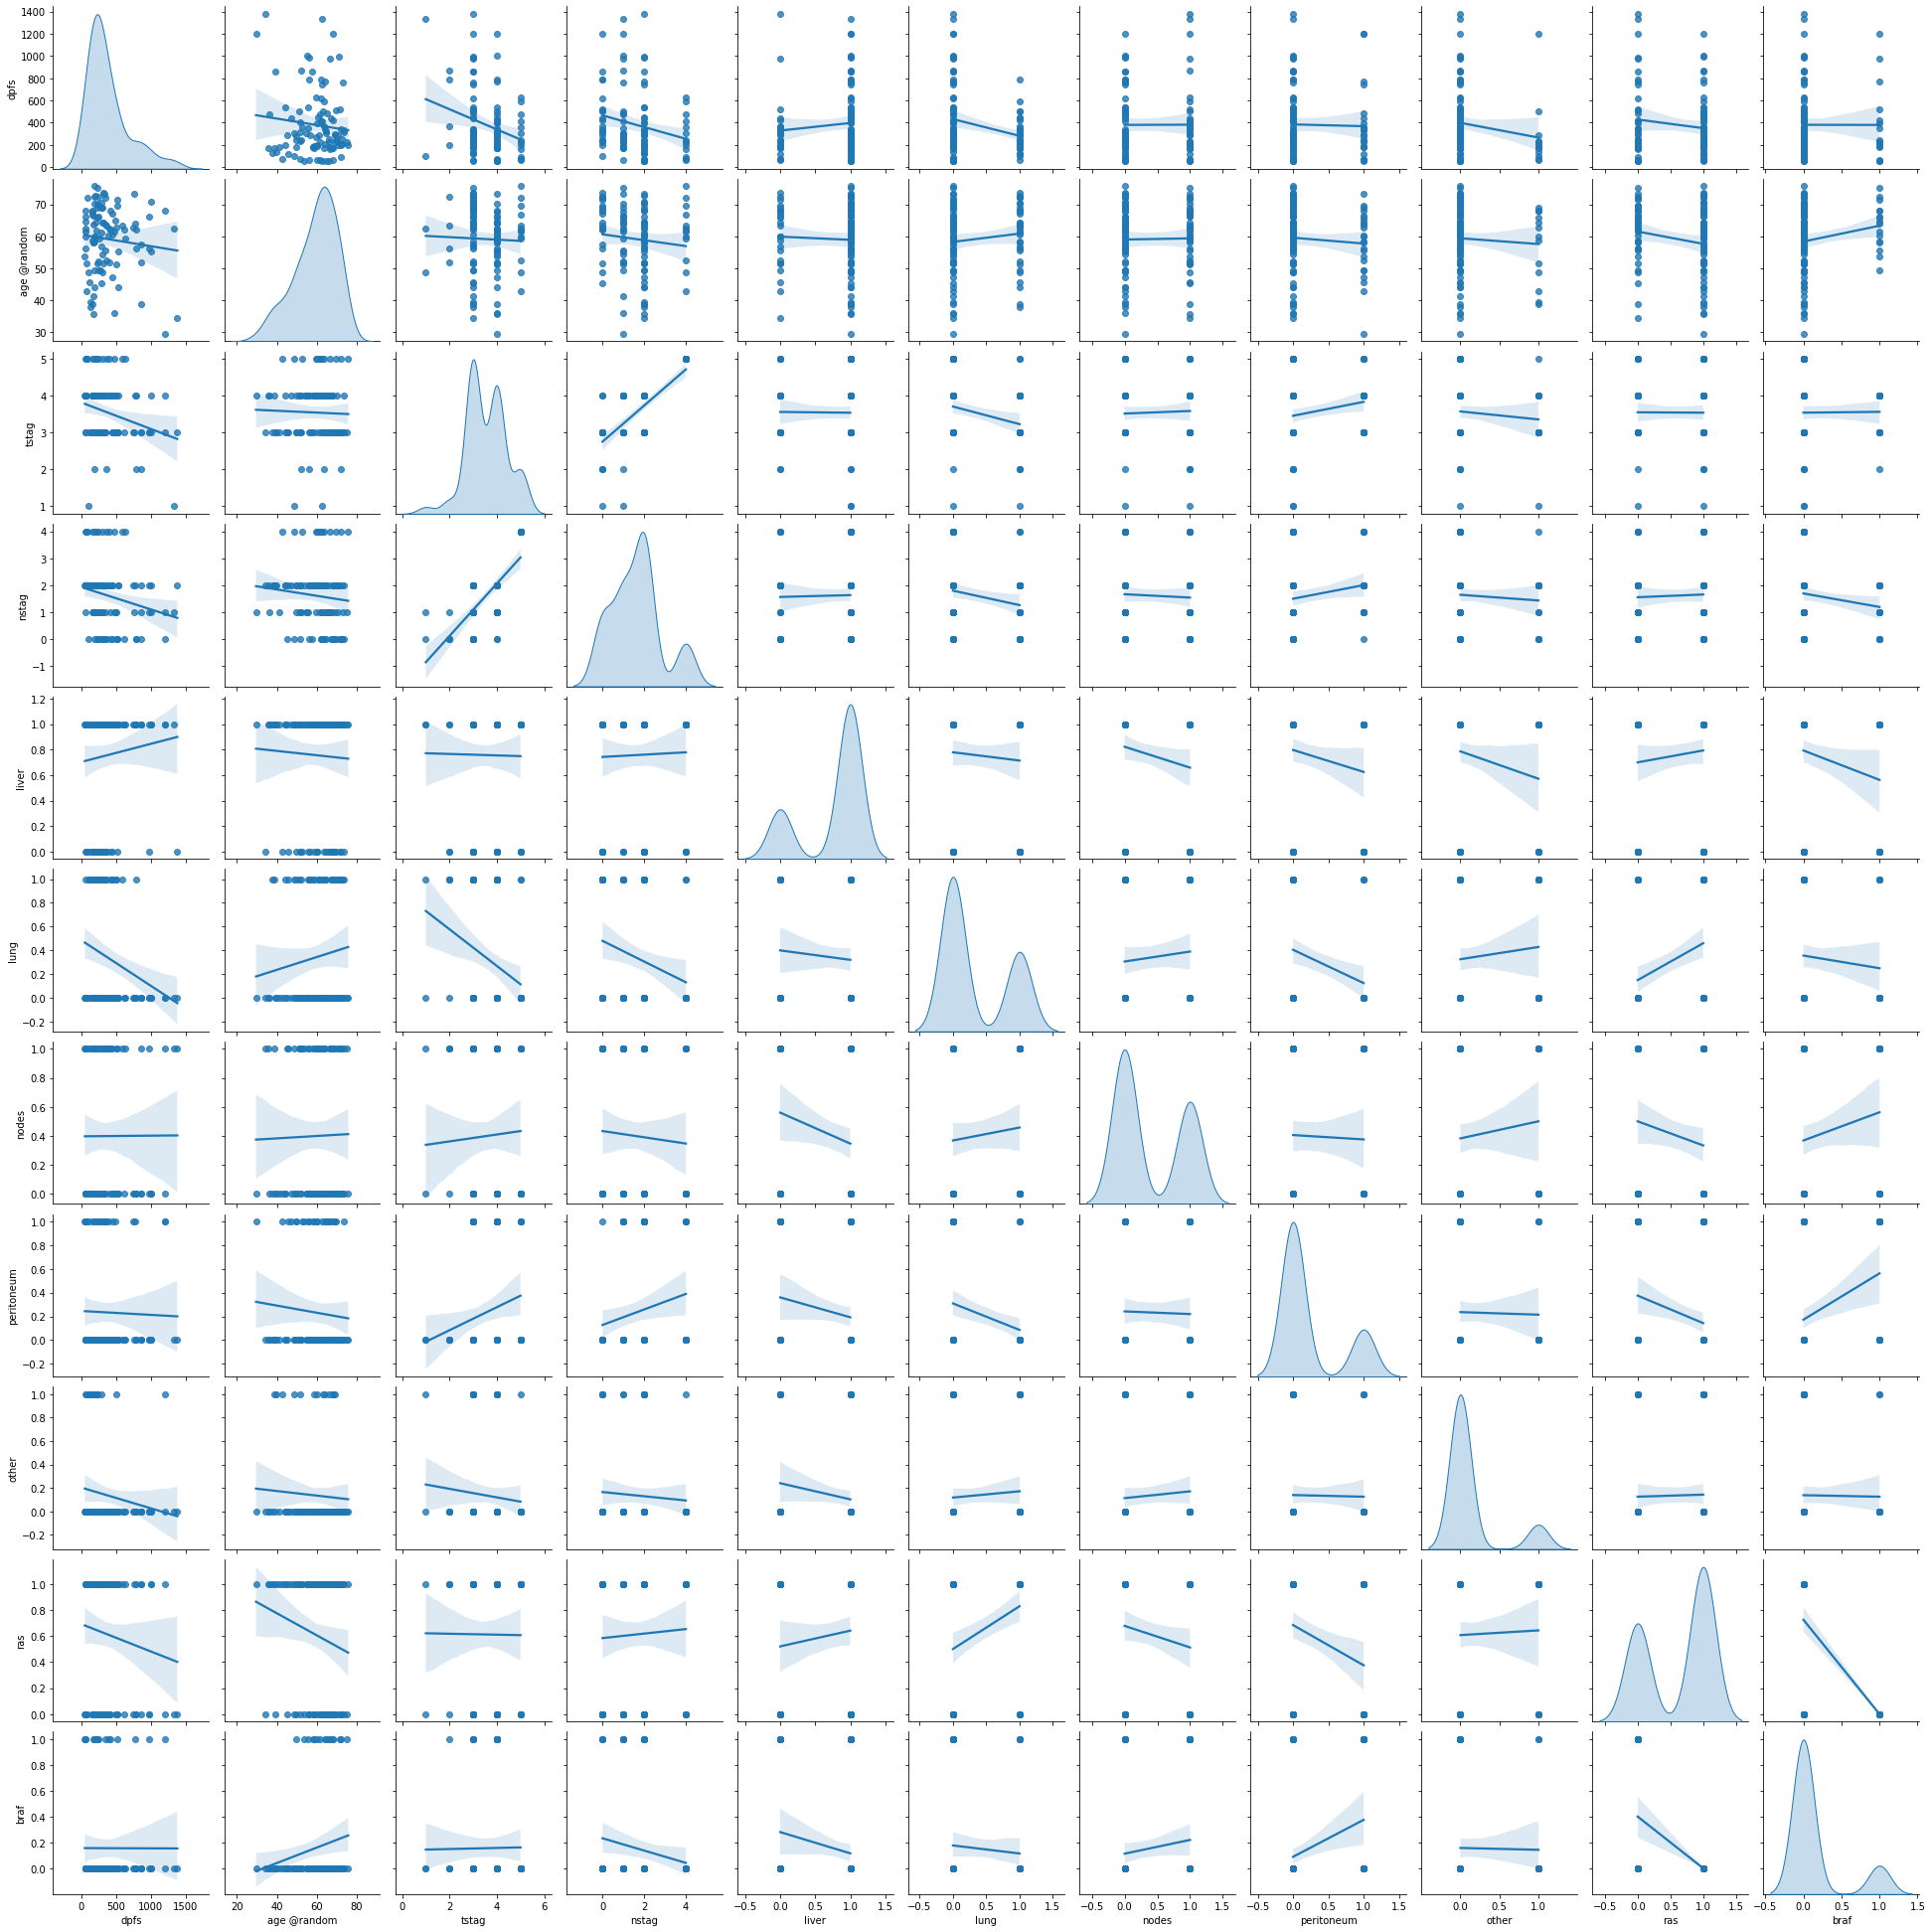

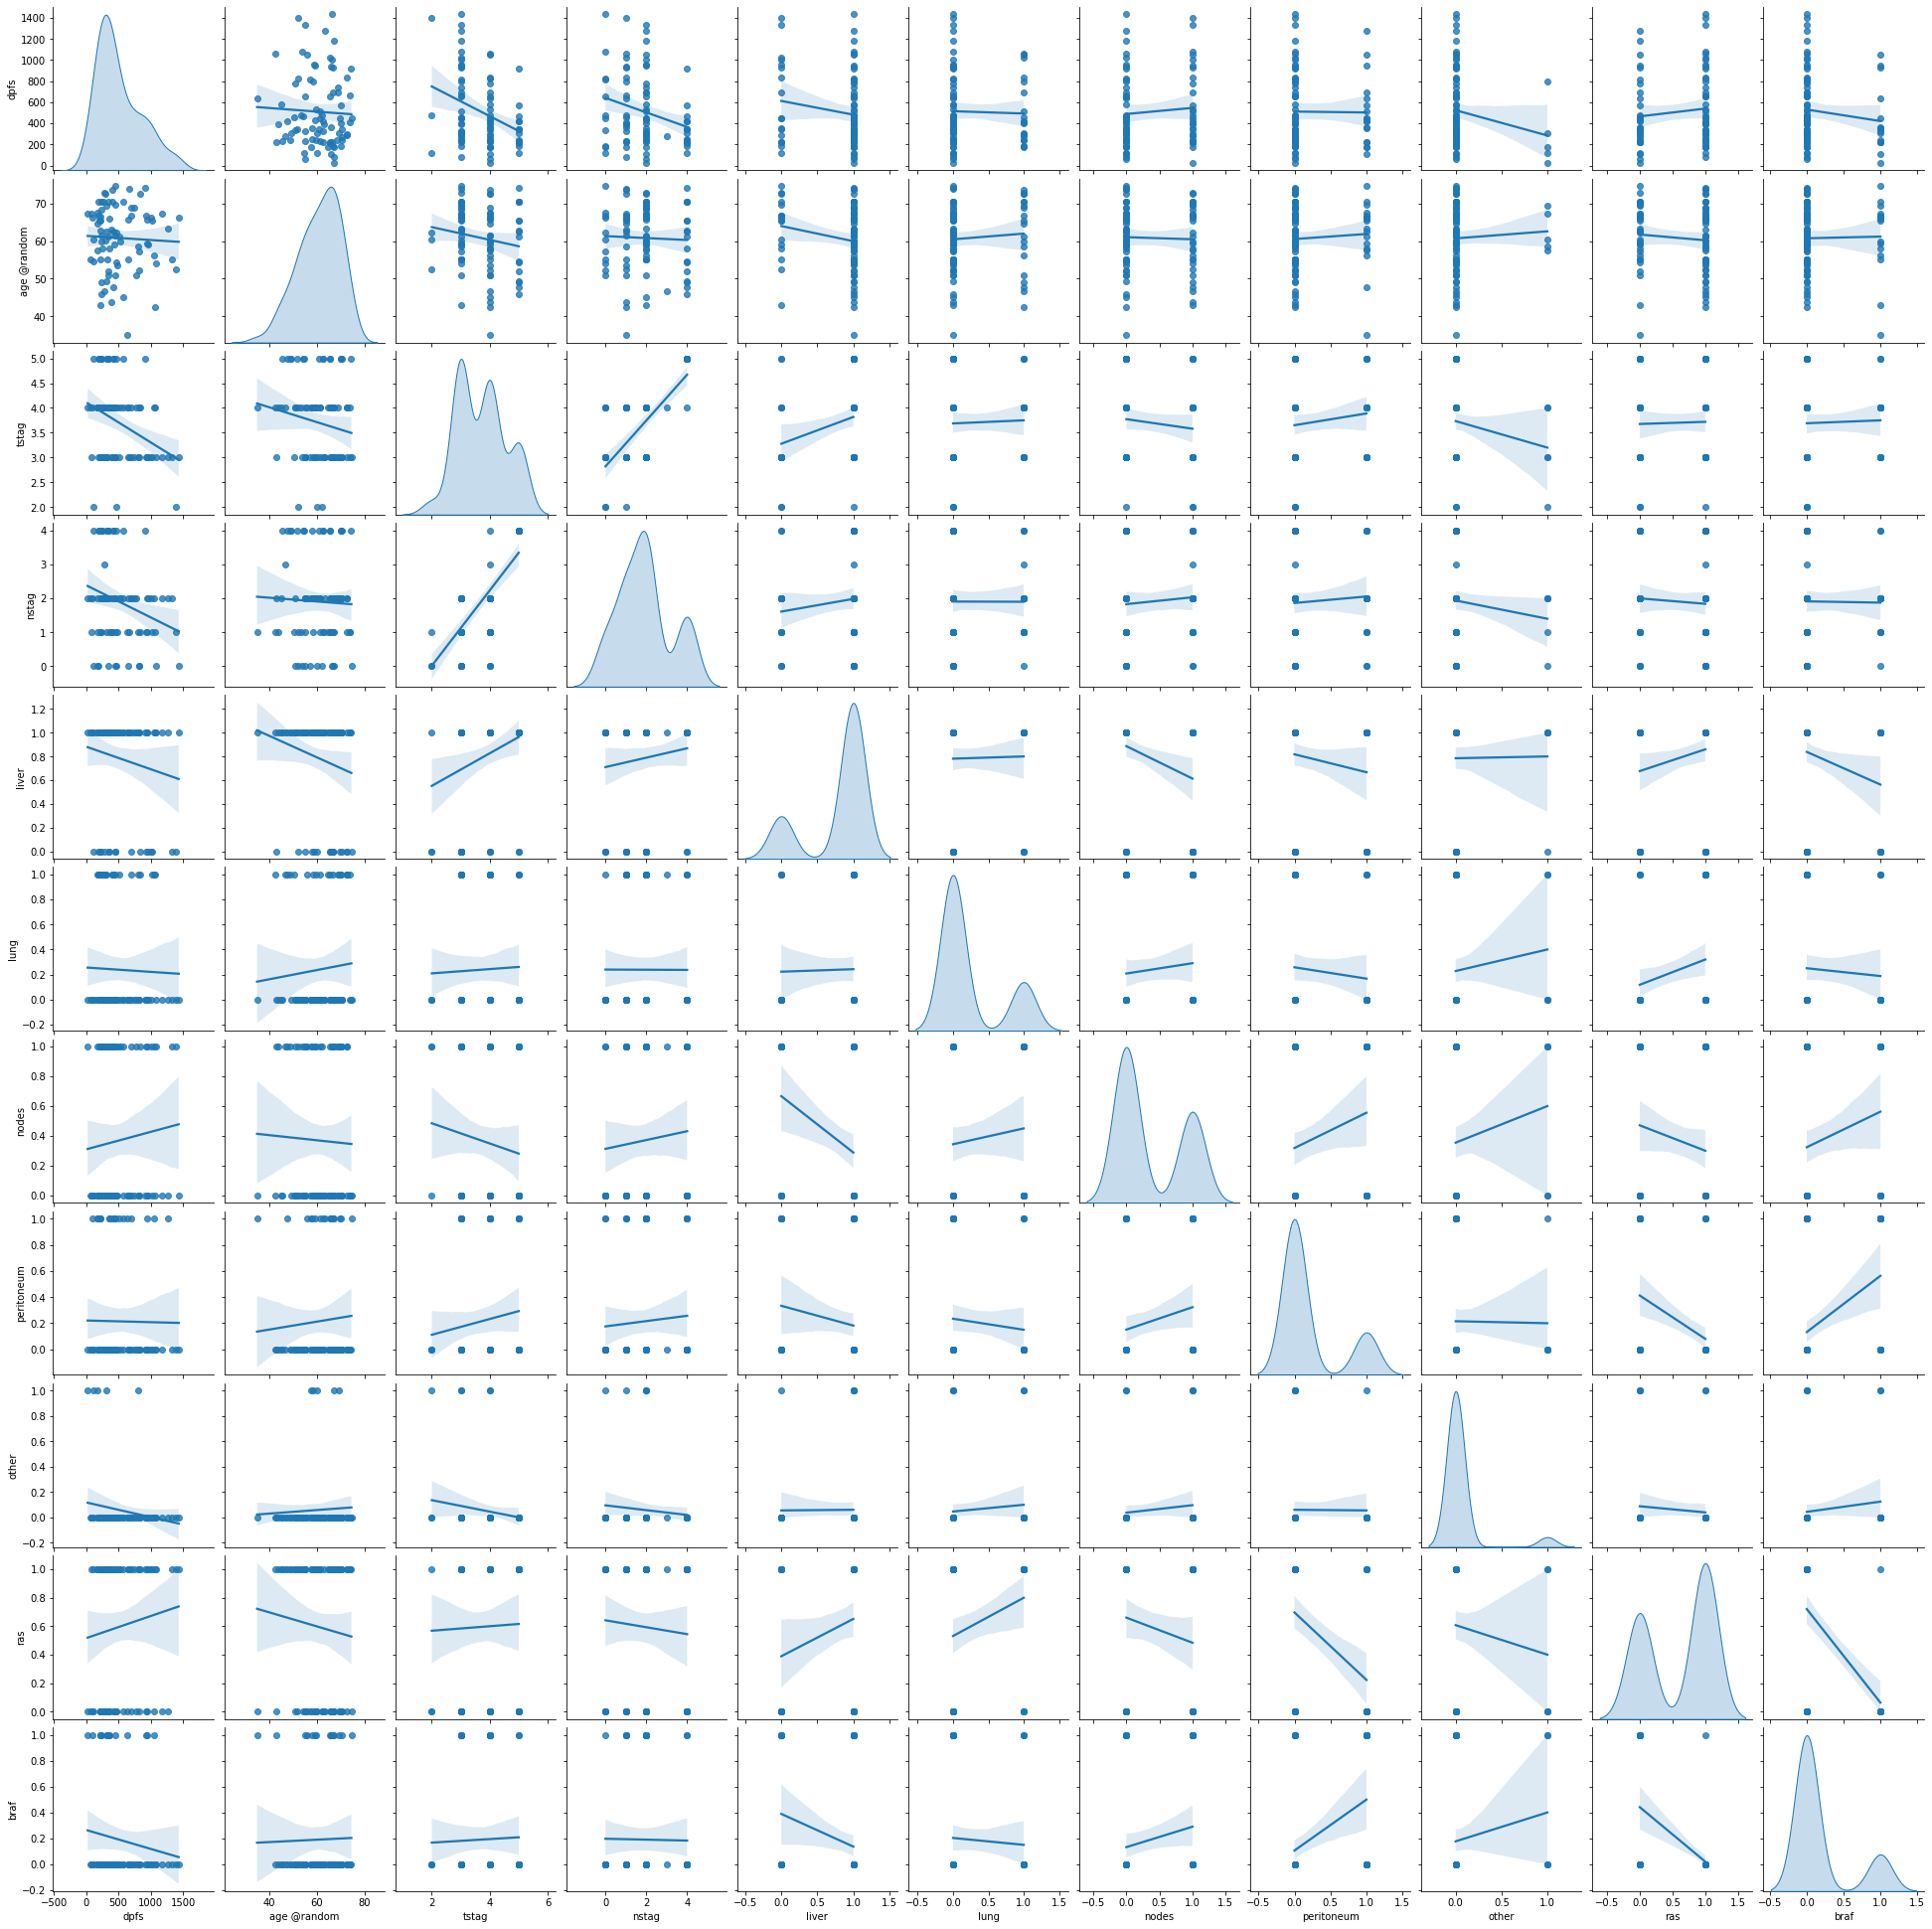

In [65]:
train_dataset = c0_x_train.copy()
train_dataset.insert(0, "dpfs", c0_y_train)
_ = sns.pairplot(train_dataset, kind="reg", diag_kind="kde")

train_dataset = c1_x_train.copy()
train_dataset.insert(0, "dpfs", c1_y_train)
_ = sns.pairplot(train_dataset, kind="reg", diag_kind="kde")

### Ridge model

In [66]:
from sklearn.linear_model import Ridge
from sklearn.compose import TransformedTargetRegressor

model = TransformedTargetRegressor(
    regressor=Ridge(alpha=1e-10), func=np.log10, inverse_func=sp.special.exp10
)

#### arm0

In [67]:
_ = model.fit(c0_x_train, c0_y_train)
evaluation["clinical-ridge"] = {}

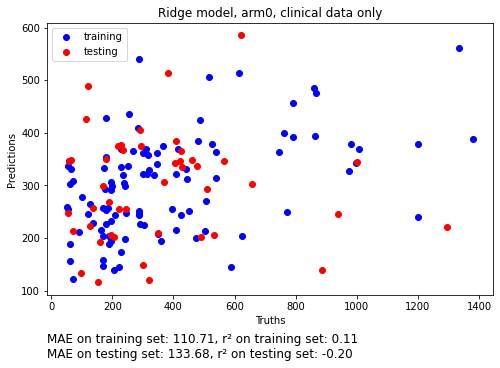

In [68]:
from sklearn.metrics import median_absolute_error, r2_score

c0_y_train_pred = model.predict(c0_x_train)
mae_train = median_absolute_error(c0_y_train, c0_y_train_pred)
r2_train = r2_score(c0_y_train, c0_y_train_pred)
score = f"MAE on training set: {mae_train:.2f}, r² on training set: {r2_train:.2f}"

fig, ax = plt.subplots(figsize=(8, 5))
plt.scatter(c0_y_train, c0_y_train_pred, c="blue", label="training")
plt.title("Ridge model, arm0, clinical data only")
plt.ylabel("Predictions")
plt.xlabel("Truths")

c0_y_pred = model.predict(c0_x_test)
mae = median_absolute_error(c0_y_test, c0_y_pred)
r2 = r2_score(c0_y_test, c0_y_pred)
score += f"\nMAE on testing set: {mae:.2f}, r² on testing set: {r2:.2f}"

plt.scatter(c0_y_test, c0_y_pred, c="red", label="testing")
plt.figtext(0.125, -0.05, score, fontsize=12)
ax.legend()
plt.show()

evaluation["clinical-ridge"]["arm0"] = [(mae_train, r2_train), (mae, r2)]

#### arm1

In [69]:
_ = model.fit(c1_x_train, c1_y_train)

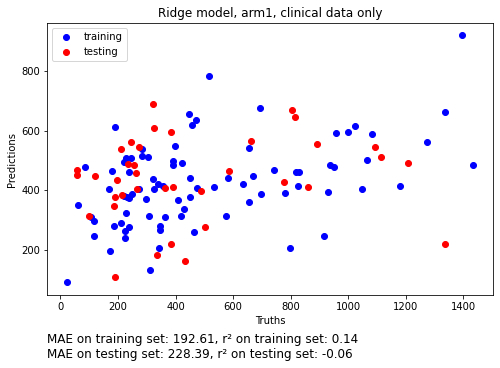

In [70]:
from sklearn.metrics import median_absolute_error, r2_score

c1_y_train_pred = model.predict(c1_x_train)
mae_train = median_absolute_error(c1_y_train, c1_y_train_pred)
r2_train = r2_score(c1_y_train, c1_y_train_pred)
score = f"MAE on training set: {mae_train:.2f}, r² on training set: {r2_train:.2f}"

fig, ax = plt.subplots(figsize=(8, 5))
plt.scatter(c1_y_train, c1_y_train_pred, c="blue", label="training")
plt.title("Ridge model, arm1, clinical data only")
plt.ylabel("Predictions")
plt.xlabel("Truths")

c1_y_pred = model.predict(c1_x_test)
mae = median_absolute_error(c1_y_test, c1_y_pred)
r2 = r2_score(c1_y_test, c1_y_pred)
score += f"\nMAE on testing set: {mae:.2f}, r² on testing set: {r2:.2f}"

plt.scatter(c1_y_test, c1_y_pred, c="red", label="testing")
plt.figtext(0.125, -0.05, score, fontsize=12)
ax.legend()
plt.show()

evaluation["clinical-ridge"]["arm1"] = [(mae_train, r2_train), (mae, r2)]

### Random forest

In [71]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.compose import TransformedTargetRegressor

model = TransformedTargetRegressor(
    regressor=RandomForestRegressor(), func=np.log10, inverse_func=sp.special.exp10
)

#### arm0

In [72]:
_ = model.fit(c0_x_train, c0_y_train)
evaluation["clinical-random-forest"] = {}

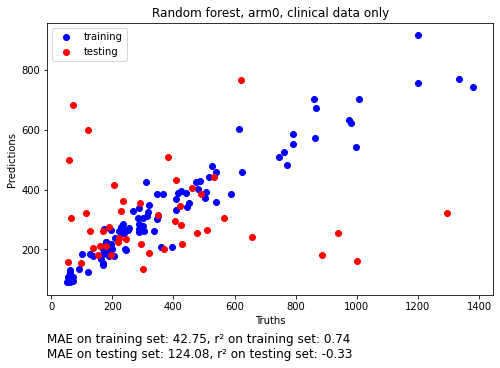

In [73]:
from sklearn.metrics import median_absolute_error, r2_score

c0_y_train_pred = model.predict(c0_x_train)
mae_train = median_absolute_error(c0_y_train, c0_y_train_pred)
r2_train = r2_score(c0_y_train, c0_y_train_pred)
score = f"MAE on training set: {mae_train:.2f}, r² on training set: {r2_train:.2f}"

fig, ax = plt.subplots(figsize=(8, 5))
plt.scatter(c0_y_train, c0_y_train_pred, c="blue", label="training")
plt.title("Random forest, arm0, clinical data only")
plt.ylabel("Predictions")
plt.xlabel("Truths")

c0_y_pred = model.predict(c0_x_test)
mae = median_absolute_error(c0_y_test, c0_y_pred)
r2 = r2_score(c0_y_test, c0_y_pred)
score += f"\nMAE on testing set: {mae:.2f}, r² on testing set: {r2:.2f}"

plt.scatter(c0_y_test, c0_y_pred, c="red", label="testing")
plt.figtext(0.125, -0.05, score, fontsize=12)
ax.legend()
plt.show()

evaluation["clinical-random-forest"]["arm0"] = [(mae_train, r2_train), (mae, r2)]

#### arm1

In [74]:
_ = model.fit(c1_x_train, c1_y_train)

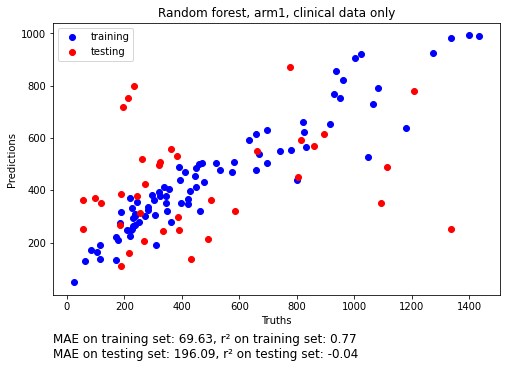

In [75]:
from sklearn.metrics import median_absolute_error, r2_score

c1_y_train_pred = model.predict(c1_x_train)
mae_train = median_absolute_error(c1_y_train, c1_y_train_pred)
r2_train = r2_score(c1_y_train, c1_y_train_pred)
score = f"MAE on training set: {mae_train:.2f}, r² on training set: {r2_train:.2f}"

fig, ax = plt.subplots(figsize=(8, 5))
plt.scatter(c1_y_train, c1_y_train_pred, c="blue", label="training")
plt.title("Random forest, arm1, clinical data only")
plt.ylabel("Predictions")
plt.xlabel("Truths")

c1_y_pred = model.predict(c1_x_test)
mae = median_absolute_error(c1_y_test, c1_y_pred)
r2 = r2_score(c1_y_test, c1_y_pred)
score += f"\nMAE on testing set: {mae:.2f}, r² on testing set: {r2:.2f}"

plt.scatter(c1_y_test, c1_y_pred, c="red", label="testing")
plt.figtext(0.125, -0.05, score, fontsize=12)
ax.legend()
plt.show()

evaluation["clinical-random-forest"]["arm1"] = [(mae_train, r2_train), (mae, r2)]

### Decision tree

In [117]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.compose import TransformedTargetRegressor

model = TransformedTargetRegressor(
    regressor=DecisionTreeRegressor(criterion="mae", max_depth=4),
    func=np.log10,
    inverse_func=sp.special.exp10,
)
model = DecisionTreeRegressor(criterion="mae", max_depth=10, min_samples_split=10)

#### arm0

In [118]:
_ = model.fit(c0_x_train, c0_y_train)
evaluation["clinical-decision-tree"] = {}

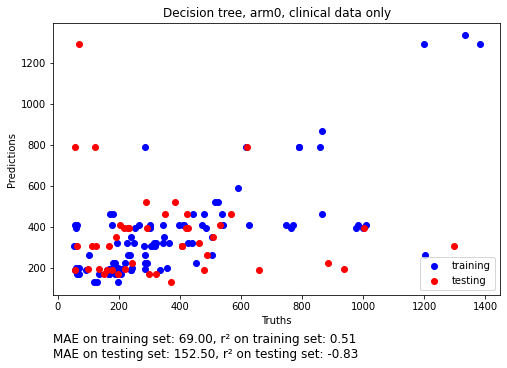

In [119]:
from sklearn.metrics import median_absolute_error, r2_score

c0_y_train_pred = model.predict(c0_x_train)
mae_train = median_absolute_error(c0_y_train, c0_y_train_pred)
r2_train = r2_score(c0_y_train, c0_y_train_pred)
score = f"MAE on training set: {mae_train:.2f}, r² on training set: {r2_train:.2f}"

fig, ax = plt.subplots(figsize=(8, 5))
plt.scatter(c0_y_train, c0_y_train_pred, c="blue", label="training")
plt.title("Decision tree, arm0, clinical data only")
plt.ylabel("Predictions")
plt.xlabel("Truths")

c0_y_pred = model.predict(c0_x_test)
mae = median_absolute_error(c0_y_test, c0_y_pred)
r2 = r2_score(c0_y_test, c0_y_pred)
score += f"\nMAE on testing set: {mae:.2f}, r² on testing set: {r2:.2f}"

plt.scatter(c0_y_test, c0_y_pred, c="red", label="testing")
plt.figtext(0.125, -0.05, score, fontsize=12)
ax.legend()
plt.show()

evaluation["clinical-decision-tree"]["arm0"] = [(mae_train, r2_train), (mae, r2)]

In [120]:
%pip install six
from six import StringIO
from sklearn import tree
import graphviz
dot_data = StringIO()
tree.export_graphviz(
    model,
    out_file=dot_data,
    feature_names=c0_x_train.columns,
    filled=True,
    rounded=True,
    impurity=True,
)
graph = graphviz.Source(dot_data.getvalue())
graph.render("treeAllData.pdf", view=True)

Note: you may need to restart the kernel to use updated packages.


'treeAllData.pdf.pdf'

#### arm1

In [79]:
_ = model.fit(c1_x_train, c1_y_train)

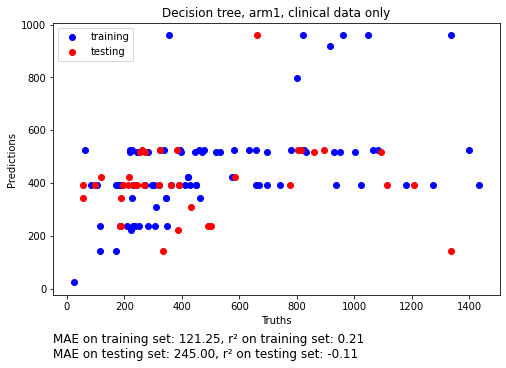

In [80]:
from sklearn.metrics import median_absolute_error, r2_score

c1_y_train_pred = model.predict(c1_x_train)
mae_train = median_absolute_error(c1_y_train, c1_y_train_pred)
r2_train = r2_score(c1_y_train, c1_y_train_pred)
score = f"MAE on training set: {mae_train:.2f}, r² on training set: {r2_train:.2f}"

fig, ax = plt.subplots(figsize=(8, 5))
plt.scatter(c1_y_train, c1_y_train_pred, c="blue", label="training")
plt.title("Decision tree, arm1, clinical data only")
plt.ylabel("Predictions")
plt.xlabel("Truths")

c1_y_pred = model.predict(c1_x_test)
mae = median_absolute_error(c1_y_test, c1_y_pred)
r2 = r2_score(c1_y_test, c1_y_pred)
score += f"\nMAE on testing set: {mae:.2f}, r² on testing set: {r2:.2f}"

plt.scatter(c1_y_test, c1_y_pred, c="red", label="testing")
plt.figtext(0.125, -0.05, score, fontsize=12)
ax.legend()
plt.show()

evaluation["clinical-decision-tree"]["arm1"] = [(mae_train, r2_train), (mae, r2)]

## Incorporating clinical data

In [81]:
temp_a0 = clinical[clinical["arm"] == 0][
    [
        "PatientFirstName",
        "age @random",
        "tstag",
        "nstag",
        "liver",
        "lung",
        "nodes",
        "peritoneum",
        "other",
        "ras",
        "braf",
    ]
]
temp_a1 = clinical[clinical["arm"] == 1][
    [
        "PatientFirstName",
        "age @random",
        "tstag",
        "nstag",
        "liver",
        "lung",
        "nodes",
        "peritoneum",
        "other",
        "ras",
        "braf",
    ]
]

# Dataset contains null values, encoded in all sort of ways..
temp_a0 = temp_a0[
    (temp_a0["tstag"] != -99)
    & (temp_a0["nstag"] != -99)
    & (temp_a0["tstag"] != -99)
    & (temp_a0["liver"] != -99)
    & (temp_a0["lung"] != -99)
    & (temp_a0["peritoneum"] != -99)
    & (temp_a0["other"] != -99)
    & (temp_a0["ras"].isin([0, 1]))
    & (temp_a0["braf"].isin([0, 1]))
]
temp_a1 = temp_a1[
    (temp_a1["tstag"] != -99)
    & (temp_a1["nstag"] != -99)
    & (temp_a1["tstag"] != -99)
    & (temp_a1["liver"] != -99)
    & (temp_a1["lung"] != -99)
    & (temp_a1["peritoneum"] != -99)
    & (temp_a1["other"] != -99)
    & (temp_a1["ras"].isin([0, 1]))
    & (temp_a1["braf"].isin([0, 1]))
]

ca0_dataset = temp_a0.join(
    arm0_all_dataset.set_index("PatientFirstName"), on="PatientFirstName"
)
#ca0_dataset = ca0_dataset[(ca0_dataset["dpfs"] < 400)]
ca1_dataset = temp_a1.join(
    arm1_all_dataset.set_index("PatientFirstName"), on="PatientFirstName"
)
#ca1_dataset = ca1_dataset[(ca1_dataset["dpfs"] < 400)]

In [82]:
ca0_x, ca0_y = (
    ca0_dataset.drop(["dpfs", "PatientFirstName"], axis="columns"),
    ca0_dataset["dpfs"],
)
ca0_x_train, ca0_x_test, ca0_y_train, ca0_y_test = train_test_split(
    ca0_x, ca0_y, test_size=0.30, random_state=42
)

ca1_x, ca1_y = (
    ca1_dataset.drop(["dpfs", "PatientFirstName"], axis="columns"),
    ca1_dataset["dpfs"],
)
ca1_x_train, ca1_x_test, ca1_y_train, ca1_y_test = train_test_split(
    ca1_x, ca1_y, test_size=0.30, random_state=42
)

### Ridge model

In [83]:
from sklearn.linear_model import Ridge
from sklearn.compose import TransformedTargetRegressor

model = TransformedTargetRegressor(
    regressor=Ridge(alpha=1e-10), func=np.log10, inverse_func=sp.special.exp10
)

#### arm0

In [84]:
_ = model.fit(ca0_x_train, ca0_y_train)
evaluation["clinical-all-ridge"] = {}

/opt/jupyter/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:187: LinAlgWarning: Ill-conditioned matrix (rcond=5.12731e-17): result may not be accurate.
  dual_coef = linalg.solve(K, y, sym_pos=True,


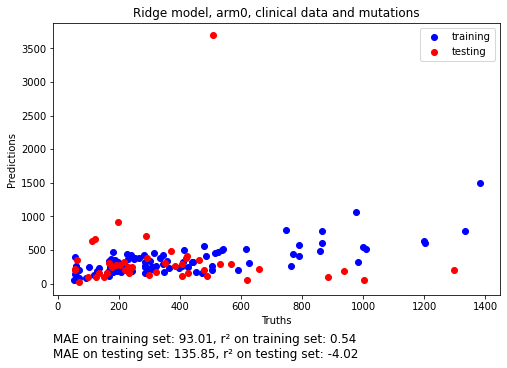

In [85]:
from sklearn.metrics import median_absolute_error, r2_score

ca0_y_train_pred = model.predict(ca0_x_train)
mae_train = median_absolute_error(ca0_y_train, ca0_y_train_pred)
r2_train = r2_score(ca0_y_train, ca0_y_train_pred)
score = f"MAE on training set: {mae_train:.2f}, r² on training set: {r2_train:.2f}"

fig, ax = plt.subplots(figsize=(8, 5))
plt.scatter(ca0_y_train, ca0_y_train_pred, c="blue", label="training")
plt.title("Ridge model, arm0, clinical data and mutations")
plt.ylabel("Predictions")
plt.xlabel("Truths")

ca0_y_pred = model.predict(ca0_x_test)
mae = median_absolute_error(ca0_y_test, ca0_y_pred)
r2 = r2_score(ca0_y_test, ca0_y_pred)
score += f"\nMAE on testing set: {mae:.2f}, r² on testing set: {r2:.2f}"

plt.scatter(ca0_y_test, ca0_y_pred, c="red", label="testing")
plt.figtext(0.125, -0.05, score, fontsize=12)
ax.legend()
plt.show()

evaluation["clinical-all-ridge"]["arm0"] = [(mae_train, r2_train), (mae, r2)]

#### arm1

In [86]:
_ = model.fit(ca1_x_train, ca1_y_train)

/opt/jupyter/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:187: LinAlgWarning: Ill-conditioned matrix (rcond=4.36474e-17): result may not be accurate.
  dual_coef = linalg.solve(K, y, sym_pos=True,


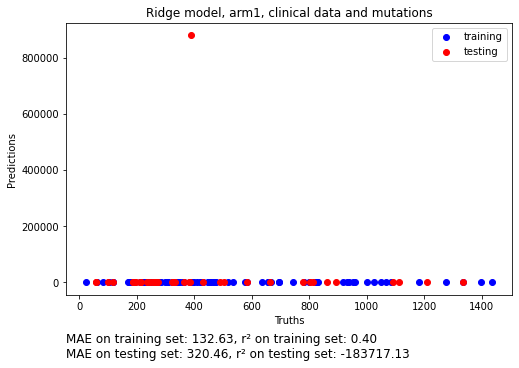

In [87]:
from sklearn.metrics import median_absolute_error, r2_score

ca1_y_train_pred = model.predict(ca1_x_train)
mae_train = median_absolute_error(ca1_y_train, ca1_y_train_pred)
r2_train = r2_score(ca1_y_train, ca1_y_train_pred)
score = f"MAE on training set: {mae_train:.2f}, r² on training set: {r2_train:.2f}"

fig, ax = plt.subplots(figsize=(8, 5))
plt.scatter(ca1_y_train, ca1_y_train_pred, c="blue", label="training")
plt.title("Ridge model, arm1, clinical data and mutations")
plt.ylabel("Predictions")
plt.xlabel("Truths")

ca1_y_pred = model.predict(ca1_x_test)
mae = median_absolute_error(ca1_y_test, ca1_y_pred)
r2 = r2_score(ca1_y_test, ca1_y_pred)
score += f"\nMAE on testing set: {mae:.2f}, r² on testing set: {r2:.2f}"

plt.scatter(ca1_y_test, ca1_y_pred, c="red", label="testing")
plt.figtext(0.125, -0.05, score, fontsize=12)
ax.legend()
plt.show()

evaluation["clinical-all-ridge"]["arm1"] = [(mae_train, r2_train), (mae, r2)]

### Random forest

In [88]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.compose import TransformedTargetRegressor

model = TransformedTargetRegressor(
    regressor=RandomForestRegressor(), func=np.log10, inverse_func=sp.special.exp10
)

#### arm0

In [89]:
_ = model.fit(ca0_x_train, ca0_y_train)
evaluation["clinical-all-random-forest"] = {}

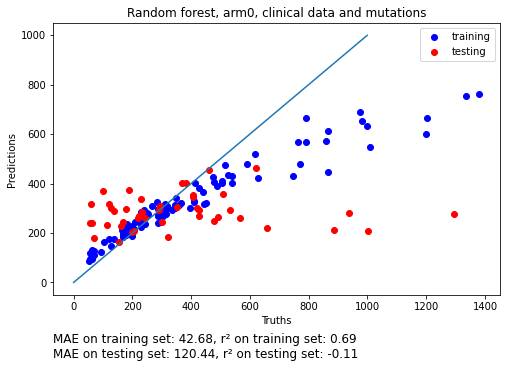

In [90]:
from sklearn.metrics import median_absolute_error, r2_score

ca0_y_train_pred = model.predict(ca0_x_train)
mae_train = median_absolute_error(ca0_y_train, ca0_y_train_pred)
r2_train = r2_score(ca0_y_train, ca0_y_train_pred)
score = f"MAE on training set: {mae_train:.2f}, r² on training set: {r2_train:.2f}"

fig, ax = plt.subplots(figsize=(8, 5))
plt.scatter(ca0_y_train, ca0_y_train_pred, c="blue", label="training")
plt.plot(range(1000), range(1000))
plt.title("Random forest, arm0, clinical data and mutations")
plt.ylabel("Predictions")
plt.xlabel("Truths")

ca0_y_pred = model.predict(ca0_x_test)
mae = median_absolute_error(ca0_y_test, ca0_y_pred)
r2 = r2_score(ca0_y_test, ca0_y_pred)
score += f"\nMAE on testing set: {mae:.2f}, r² on testing set: {r2:.2f}"

plt.scatter(ca0_y_test, ca0_y_pred, c="red", label="testing")
plt.figtext(0.125, -0.05, score, fontsize=12)
ax.legend()
plt.show()

evaluation["clinical-all-random-forest"]["arm0"] = [(mae_train, r2_train), (mae, r2)]

#### arm1

In [91]:
_ = model.fit(ca1_x_train, ca1_y_train)

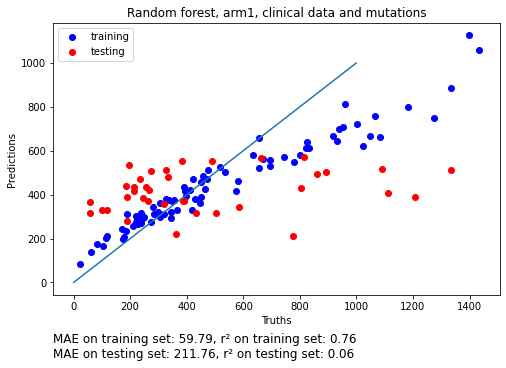

In [92]:
from sklearn.metrics import median_absolute_error, r2_score

ca1_y_train_pred = model.predict(ca1_x_train)
mae_train = median_absolute_error(ca1_y_train, ca1_y_train_pred)
r2_train = r2_score(ca1_y_train, ca1_y_train_pred)
score = f"MAE on training set: {mae_train:.2f}, r² on training set: {r2_train:.2f}"

fig, ax = plt.subplots(figsize=(8, 5))
plt.scatter(ca1_y_train, ca1_y_train_pred, c="blue", label="training")
plt.plot(range(1000), range(1000))
plt.title("Random forest, arm1, clinical data and mutations")
plt.ylabel("Predictions")
plt.xlabel("Truths")

ca1_y_pred = model.predict(ca1_x_test)
mae = median_absolute_error(ca1_y_test, ca1_y_pred)
r2 = r2_score(ca1_y_test, ca1_y_pred)
score += f"\nMAE on testing set: {mae:.2f}, r² on testing set: {r2:.2f}"

plt.scatter(ca1_y_test, ca1_y_pred, c="red", label="testing")
plt.figtext(0.125, -0.05, score, fontsize=12)
ax.legend()
plt.show()

evaluation["clinical-all-random-forest"]["arm1"] = [(mae_train, r2_train), (mae, r2)]

In [93]:
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.feature_selection import RFE

hparams = [{"n_features_to_select": list(range(5, len(ca0_x_train.columns) + 1))}]
basemodel = LinearRegression()
_ = basemodel.fit(ca0_x_train, ca0_y_train)
est = RFE(basemodel)

cvmodel = GridSearchCV(
    estimator=est,
    param_grid=hparams,
    scoring="r2",
    cv=5,
    n_jobs=-1,
    verbose=1,
    return_train_score=True,
)
cvmodel.fit(ca0_x_train, ca0_y_train)
ca0_res = pd.DataFrame(cvmodel.cv_results_)

Fitting 5 folds for each of 116 candidates, totalling 580 fits


120

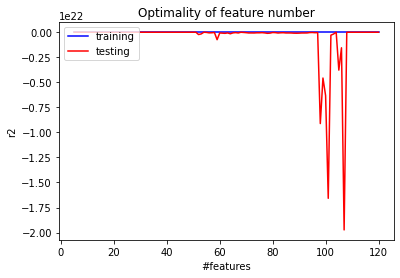

In [121]:
plt.plot(ca0_res["param_n_features_to_select"], ca0_res["mean_train_score"], c="blue")
plt.plot(ca0_res["param_n_features_to_select"], ca0_res["mean_test_score"], c="red")
plt.xlabel("#features")
plt.ylabel("r2")
plt.title("Optimality of feature number")
plt.legend(["training", "testing"], loc="upper left")
len(ca0_x_train.columns)

In [95]:
from IPython.display import display, Markdown

mk_table = """
----
## Recap of results
| Name | arm0 training MAE, r2 | arm0 testing MAE, r2 | arm1 training MAE. r2 | arm1 testing MAE. r2 |
| - | :-: | :-: | :-: | :-: |
"""

table_line = "| **{name}** | {arm0tmae:.6f} {arm0tr2:.6f} | {arm0ttmae:.6f} {arm0ttr2:.6f} | {arm1tmae:.6f} {arm1tr2:.6f} | {arm1ttmae:.6f} {arm1ttr2:.6f} |\n"

for model in evaluation:
    mk_table += table_line.format(
        name=model,
        arm0tmae=evaluation[model]["arm0"][0][0],
        arm0tr2=evaluation[model]["arm0"][0][1],
        arm0ttmae=evaluation[model]["arm0"][1][0],
        arm0ttr2=evaluation[model]["arm0"][1][1],
        arm1tmae=evaluation[model]["arm1"][0][0],
        arm1tr2=evaluation[model]["arm1"][0][1],
        arm1ttmae=evaluation[model]["arm1"][1][0],
        arm1ttr2=evaluation[model]["arm1"][1][1],
    )

display(Markdown(mk_table))


----
## Recap of results
| Name | arm0 training MAE, r2 | arm0 testing MAE, r2 | arm1 training MAE. r2 | arm1 testing MAE. r2 |
| - | :-: | :-: | :-: | :-: |
| **best-linear** | 142.157706 0.191500 | 199.936230 -0.010587 | 220.904474 0.145607 | 220.473935 -0.156778 |
| **best-lasso** | 155.220673 0.024605 | 154.220673 -0.030853 | 251.378027 0.065432 | 219.777495 -0.157927 |
| **best-random-forest** | 55.120000 0.853277 | 179.750000 -0.058224 | 92.160000 0.830582 | 192.290000 -0.692885 |
| **best-decision-tree** | 0.000000 0.864396 | 217.500000 -0.255600 | 40.500000 0.626505 | 244.000000 -1.493299 |
| **best-svr-poly** | 119.161141 -0.017460 | 163.651528 -0.095245 | 171.843285 -0.108438 | 164.488323 -0.019261 |
| **all-linear** | 137.730314 -0.035254 | 258.468594 -34472713669976133632.000000 | 80479587766.468597 -11606273965802286810660864.000000 | 80866950894.468597 -14515885763620687430287360.000000 |
| **all-lasso** | 159.451327 0.000000 | 151.548673 -0.030349 | 276.634409 0.000000 | 217.634409 -0.137796 |
| **all-random-forest** | 51.440000 0.851991 | 172.130000 -0.019953 | 102.500000 0.836889 | 261.340000 -0.680436 |
| **all-decision-tree** | 0.500000 0.866888 | 244.000000 -0.524594 | 10.000000 0.774218 | 260.000000 -1.886094 |
| **all-svr-poly** | 124.133014 -0.085155 | 159.999471 -0.177518 | 179.136808 -0.108247 | 168.930308 -0.030621 |
| **clinical-ridge** | 110.709492 0.114368 | 133.680226 -0.197506 | 192.606938 0.144500 | 228.392939 -0.058327 |
| **clinical-random-forest** | 42.751748 0.739903 | 124.080879 -0.325785 | 69.626309 0.767451 | 196.090382 -0.038107 |
| **clinical-decision-tree** | 106.000000 0.306569 | 140.503954 -0.623711 | 121.250181 0.214630 | 245.000000 -0.106697 |
| **clinical-all-ridge** | 93.007243 0.535447 | 135.852258 -4.017625 | 132.628832 0.395127 | 320.460344 -183717.134816 |
| **clinical-all-random-forest** | 42.683493 0.690397 | 120.437698 -0.108128 | 59.794565 0.761530 | 211.763984 0.055968 |


No model provides a reasonable R2 score on the testing set. 